<h1 style="text-align:center">Module 6 Assessment</h1>

Welcome to your Mod 6 Assessment. You will be tested for your understanding of concepts and ability to programmatically solve problems that have been covered in class and in the curriculum. Topics in this assessment include graph theory, natural language processing, and neural networks. 

The goal here is to demonstrate your knowledge. Showing that you know things about certain concepts is more important than getting the best model.

Use any libraries you want to solve the problems in the assessment. 

You will have up to 90 minutes to complete this assessment. 

The sections of the assessment are:

* Natural Language Processing
* Network Analysis
* Perceptrons and Multi-Layer Perceptrons
* Regularization and Optimization of Neural Networks

## Natural Language Processing

In this exercise we will attempt to classify text messages as "SPAM" or "HAM" using TF-IDF Vectorization. Once we successfully classify our texts we will examine our results to see which words are most important to each class of text messages. 

Complete the functions below and answer the question(s) at the end. 

In [9]:
#import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

In [10]:
#read in data
df_messages = pd.read_csv('data/spam.csv', usecols=[0,1])

In [11]:
#convert string labels to 1 or 0 
le = LabelEncoder()
df_messages['target'] = le.fit_transform(df_messages['v1'])

In [12]:
#examine or data
df_messages.head()

,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### TF-IDF

In [13]:
#separate features and labels 
X = df_messages['v2']
y = df_messages['target']


In [14]:
#generate a list of stopwords 
stopwords_list = stopwords.words('english') + list(string.punctuation)


<b>1) Let's create a function that takes in our various texts along with their respective labels and uses TF-IDF to vectorize the texts.  Recall that TF-IDF helps us "vectorize" text (turn text into numbers) so we can do "math" with it.  It is used to reflect how relevant a term is in a given document in a numerical way. </b>

In [15]:
#generate tf-idf vectorization (use sklearn's TfidfVectorizer) for our data
def tfidf(X, y,  stopwords_list): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list)
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer

In [16]:
tf_idf_train, tf_idf_test, y_train, y_test, vecotorizer = tfidf(X, y, stopwords_list)

### Classification

<b>2) Now that we have a set of vectorized training data we can use this data to train a classifier to learn how to classify a specific text based on the vectorized version of the text. Below we have initialized a simple Naive Bayes Classifier and Random Forest Classifier. Complete the function below which will accept a classifier object, a vectorized training set, vectorized test set, and list of training labels and return a list of predictions for our training set and a separate list of predictions for our test set.</b> 

In [17]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [18]:
#create a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    classifier.fit(tf_idf_train, y_train)
    train_preds = classifier.predict(tf_idf_train)
    test_preds = classifier.predict(tf_idf_test)
    return train_preds, test_preds

In [19]:
#generate predictions for Naive Bayes Classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier,tf_idf_train, tf_idf_test, y_train)

In [20]:
print(confusion_matrix(y_test, nb_test_preds))
print(accuracy_score(y_test, nb_test_preds))

[[1202    0]
 [  44  147]]
0.968413496051687


In [21]:
#generate predictions for Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier,tf_idf_train, tf_idf_test, y_train)

In [22]:
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))

[[1201    1]
 [  33  158]]
0.9755922469490309


You can see both classifiers do a pretty good job classifying texts as either "SPAM" or "HAM". Let's figure out which words are the most important to each class of texts! Recall that Inverse Document Frequency can help us determine which words are most important in an entire corpus or group of documents. 

<b>3) Create a function that calculates the IDF of each word in our collection of texts.</b>

In [23]:
def get_idf(class_, df, stopwords_list):
    docs = df[df.v1==class_].v2
    class_dict = {} 
    for doc in docs:
        words = set(doc.split())
        for word in words:
            if word.lower() not in stopwords_list: 
                class_dict[word.lower()] = class_dict.get(word.lower(), 0) + 1
    idf_df = pd.DataFrame.from_dict(class_dict, orient='index')
    idf_df.columns = ['IDF']
    idf_df.IDF = len(docs)/idf_df.IDF
    idf_df = idf_df.sort_values(by="IDF", ascending=True)
    return idf_df.head(10)

In [24]:
get_idf('spam', df_messages, stopwords_list)

,IDF
call,2.277439
free,4.698113
txt,5.574627
2,5.746154
ur,6.073171
u,7.047170
mobile,7.114286
text,7.114286
claim,7.182692
reply,7.781250


In [25]:
get_idf('ham', df_messages, stopwords_list)

,IDF
u,7.310606
i'm,14.067055
get,17.481884
2,20.188285
go,22.133028
got,22.133028
&lt;#&gt;,22.546729
like,23.309179
call,23.309179
come,23.651961


### Explain
<b> 4) Imagine that the word "school" has the highest TF-IDF value in the second document of our test data. What does that tell us about the word school? </b>

In [ ]:
# Answer: The word, school is very unique. It is not found frequently across 
# many documents but its present in the second document meaning it has significant importance to this document.

## Network Analysis

For these next questions, you'll be using a graph dataset of facebook users and networkx. In the next cell, we're going to read in the dataset.

In [26]:
import networkx as nx
G = nx.read_edgelist('./data/0.edges')

###### 1) Create a function `find_centrality` that returns a dictionary with the user with the highest betweenness centrality and the user with the highest degree centrality. It should return a dictionary that looks like:


{'bc' : |user|, 'dc' : |user|}

In [27]:
def find_centrality(graph):
    bc = nx.algorithms.centrality.betweenness_centrality(graph)
    max_bc = max(bc.items(), key = lambda kv : kv[1] )
    print('betweenness centrality: ',max_bc)
    dc = nx.algorithms.centrality.degree_centrality(graph)
    max_dc = max(dc.items(), key= lambda kv : kv[1])
    print('degree centrality: ', max_dc)
    centrality_dict = {'bc':max_bc[0],'dc':max_dc[0]}
    return centrality_dict

#### 2) How does each of these people wield influence on the network? Imagine a message had to get to people from different communities. Who would be the best user to deliver the message to ensure that people from opposite communities receive the message?

In [28]:
find_centrality(G)

betweenness centrality:  ('277', 0.2658578437822957)
degree centrality:  ('56', 0.23192771084337352)


{'bc': '277', 'dc': '56'}

// answer here //

In [ ]:
# The user with the highest degree centrality has the most overall connections.
# The user with the highest betweenness centrality has the most connections go through them. 
# The user with the highest betweenness centrality (277) would be the best person to
# ensure that people from disparate communities receive the message.

#### 3) A marketing group is looking to target different communities with advertisements based off of their assumed mutual interests. 

#### Use the `k_cliques_communities` method to calculate the number of cliques formed with k users in a function `find_k_communities`. Calculate how many communities there are if the minimum size of a clique is 5.


In [29]:
def find_k_communities(graph, k):
    return len(list(nx.algorithms.community.kclique.k_clique_communities(graph, k)))

In [31]:
find_k_communities(G, 5)

12

## Perceptrons and Multi Layer Perceptrons

In the first neural network portion of this assessment, you are going to start off by answering questions related to the mechanics of basic neural networks. After, you will look at various ways of tuning neural networks by way of regularization and optimization. To start off with, we are going to import all the libraries that you might need for the questions in this section.

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets import make_gaussian_quantiles, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import Sequential, regularizers
from keras.layers import Dense
from keras.initializers import RandomNormal

/Users/forest.polchow/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<center><b>The Sigmoid Function</b></center>
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

<center><b>A Diagram of Simple Perceptron</b></center>

<img src='images/perceptron.png'/>

##### 1) What are the inputs and outputs of a perceptron?

// answer here //

In [ ]:
# Inputs are either exogenous variables or outputs of other perceptrons. 
# The output is the result of the multiplication of weights and biases, the addition of a bias term, 
# and then transformation via an activation function e.g. the sigmoid function.

##### 2) We've completed the sigmoid function for you. Let's create a function that takes in an array of inputs (x) along with predefined weights (w), a bias (b) and returns the output of a perceptron. 

In [5]:
def sigmoid(input_function):
    return 1/(1+np.exp(-1*input_function))

In [1]:
def perceptron_output(x,w,b):
    
    return sigmoid(np.sum(np.multiply(x,w)+b))

In [2]:
x = [1, .19, 1]
w = [.2, .9, .75]
b = 0.5

In [8]:
perceptron_output(x,w,b)

0.9322009360964977

<center><b>Diagram of a Multi Layer Perceptron</b></center>

<img src='images/Deeper_network_day2.png'/>

##### 3) Describe the process of forward propagation in neural networks

In [ ]:
# Outputs of each perceptron are propagated to each node of the next layer and scaled by weights specific to each of these connections.

##### 4) How does what happens in forward-propagation change what happens in back-propagation? Be as specific as possible.

In [ ]:
# Each time the neural network propagates forward for a given batch, there are residuals due to inaccuracy. 
# To update the weights and biases in the network, the derivatives of each term are calculated using 
# these residuals and then simultaneously updated using the process of gradient descent.

##### 5) Imagine you are trying classifying audio files into five different classes of sounds. What should your activation function be in the output layer and why? 

In [ ]:
# This is a multi-label problem. There should be one output for each label. 
# If a specific output node is over a certain threshold, then that node's label is assigned to that observation.
# The activation function should be a soft max activation.

## Regularization and Optimization of Neural Networks

Now you're going to train full neural networks on a _small_ set of data. It is a binary classification problem in which you need to identify whether or not a dot will belong to the teal or orange class.

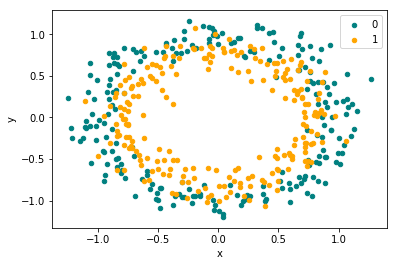

In [6]:
np.random.seed(0)
# generate 2d classification dataset
X, y = make_circles(n_samples=450, noise=0.12)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'teal', 1:'orange'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key != 2:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In the two cells below, the set of data has been split into a training and testing set and then fit to a neural network with two hidden layers. Run the two cells below to see how well the model performs.

In [7]:
#train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
np.random.seed(0)

#Instantiate Classifier
classifier = Sequential()

#Hidden Layer
classifier.add(Dense(
    32, 
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',

))

#Hidden Layer
classifier.add(Dense(
    32,
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',

))

#Output Layer
classifier.add(Dense(
    1, 
    activation='sigmoid',
    kernel_initializer='random_uniform',
))

classifier.compile(optimizer ='adam',loss="binary_crossentropy",metrics =['accuracy'])

classifier.fit(X_train, y_train, epochs=25, verbose=0, batch_size=10, shuffle=False)

# TRAIN

#predict classes
predicted_vals_train = classifier.predict_classes(X_train)
#show accuracy score
print(accuracy_score(y_train,predicted_vals_train))


# TEST

#predict classess
predicted_vals_test = classifier.predict_classes(X_test)
#show accuracy score
print(accuracy_score(y_test,predicted_vals_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


##### 1) Modify the code below to use L2 regularization


The model appears to be overfitting. To deal with this overfitting, modify the code below to include L2 regularization in the model. 

In [ ]:
np.random.seed(0)

#Instantiate Classifier
classifier2 = Sequential()

#Hidden Layer
classifier2.add(Dense(
    32, 
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal'

))

#Hidden Layer
classifier2.add(Dense(
    32,
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal'

))

#Output Layer
classifier2.add(Dense(
    1, 
    activation='sigmoid',
    kernel_initializer='random_uniform',
))

classifier2.compile(optimizer ='adam',loss="binary_crossentropy",metrics =['accuracy'])

classifier2.fit(X_train, y_train, epochs=25, verbose=0, batch_size=10, shuffle=False)

# TRAIN

#predict classes
predicted_vals_train = classifier2.predict_classes(X_train)
#show accuracy score
print(accuracy_score(y_train,predicted_vals_train))

# TEST

#predict classess
predicted_vals_test = classifier2.predict_classes(X_test)
#show accuracy score
print(accuracy_score(y_test,predicted_vals_test))


Did the regularization you performed prevent overfitting?

In [ ]:
# Yes, it did prevent overfitting, we know this because the testing accuracy has improved, even though the training accuracy decreased.

##### 2) Explain how regularization is related to the bias/variance tradeoff within Neural Networks and how it's related to the results you just achieved in the training and test accuracies of the previous models. What does regularization change in the training process (be specific to what is being regularized and how it is regularizing)?


In [ ]:
# Regularization helps prevent over fitting by adding penalty terms to the cost function. 
# This prevents any one feature to having too much importance in a model.

##### 3) How might L1  and dropout regularization change a neural network's architecture?

In [ ]:
# L1 and dropout regularization may eliminate connections between nodes entirely.